Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


# Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Загрузим данные

In [2]:
mplane_flights = pd.read_csv('/datasets/query_1.csv')
city_avgflights = pd.read_csv('/datasets/query_3.csv')

In [3]:
def df_info(df):
    df.info()
    display(df.head(10))
    print()
    print(f'Пропуски: {df.isnull().sum()}')
    print()
    print(f'Кол-во дубликатов: {df.duplicated().sum()}')

#### Информация по моделям самолетов и кол-ва полетов

In [4]:
df_info(mplane_flights)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185



Пропуски: model             0
flights_amount    0
dtype: int64

Кол-во дубликатов: 0


*У нас в обиходе имеется 8 моделей и кол-ва их полетов. Датасет без пропусков и бубликатов*

#### Информация по городам и ср. кол-ву полетов

In [5]:
df_info(city_avgflights)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000



Пропуски: city               0
average_flights    0
dtype: int64

Кол-во дубликатов: 0


*В датасете 101 город*

#### Рассмотрим информацию по кол-ву полетов самолетов

In [6]:
mplane_flights.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


C:\Users\Dinmukhamed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='flights_amount', ylabel='Density'>

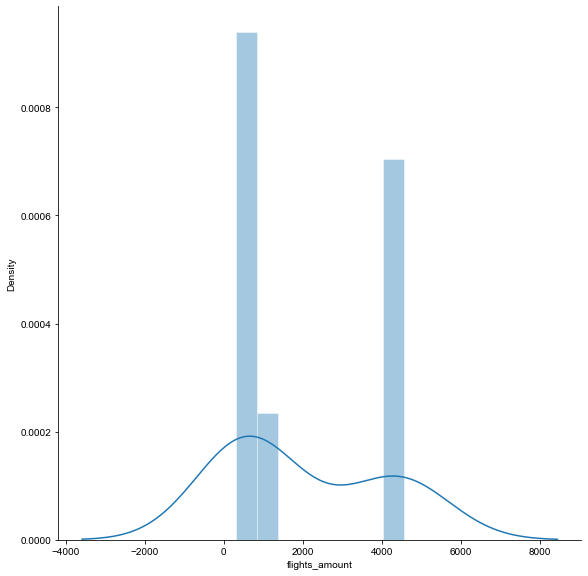

In [7]:
sns.FacetGrid(mplane_flights['flights_amount'], height=8)
sns.set_style("whitegrid")
sns.distplot(mplane_flights['flights_amount'], bins=8)

C:\Users\Dinmukhamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


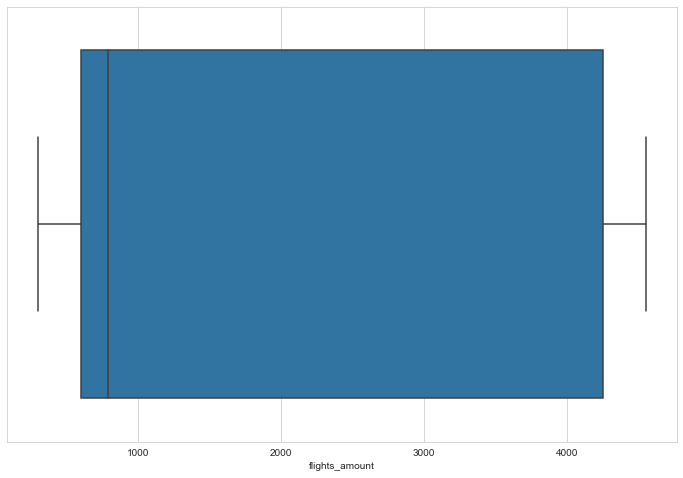

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(mplane_flights['flights_amount'])
plt.show()

*Есть предположение, что только несколько воздушных бортов пользуются популярность*

In [9]:
display(mplane_flights.query('flights_amount > 1000'))

,model,flights_amount
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


*Ага, всего 3 модели имеют сильную популярность у авиакомпаний*

<font color='blue'><b>Комментарий ревьювера</b></font> \
<font color='green'>Да, переходим к общей гистограмме

#### Расмотрим по гистограмме различие по кол-ву полетов

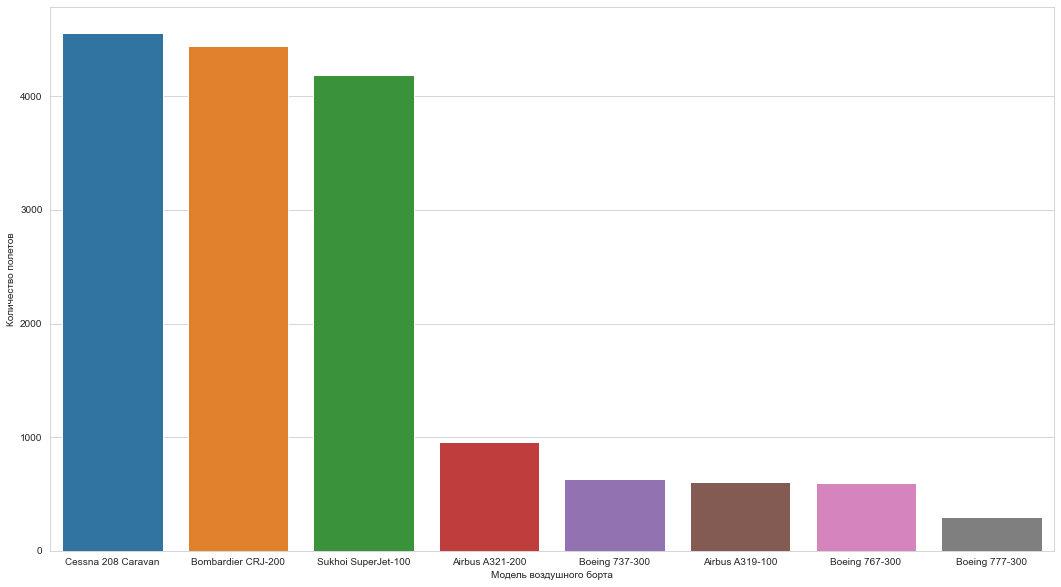

In [10]:
mplane_flights = mplane_flights.sort_values(by='flights_amount', ascending=False)
plt.figure(figsize=(18, 10))
sns.barplot(x=mplane_flights['model'], y=mplane_flights['flights_amount'])
plt.xlabel('Модель воздушного борта')
plt.ylabel('Количество полетов')
plt.show()

*Различие очень сильное. Может быть первая 3-ца имеет недорогое обслуживание, либо их стоимость не так велика, но явные преимущества точно есть. Если были бы тех. хар-ки, то можно было построить схему и выявить их показатели конкурентоспособности. Также возможен вариант того, что такой отрыв все же связан с тем, что лидеры - мелкие самолеты. Скорее всего, они летают, как челноки, часто или в труднодоступных регионах. Расстояния короткие, вот и количество рейсов такое большое*

### Рассмотрим информацию по городам

In [11]:
city_avgflights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


*Судя по максимальному значению, у нас есть 1 победитель*

C:\Users\Dinmukhamed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_flights', ylabel='Density'>

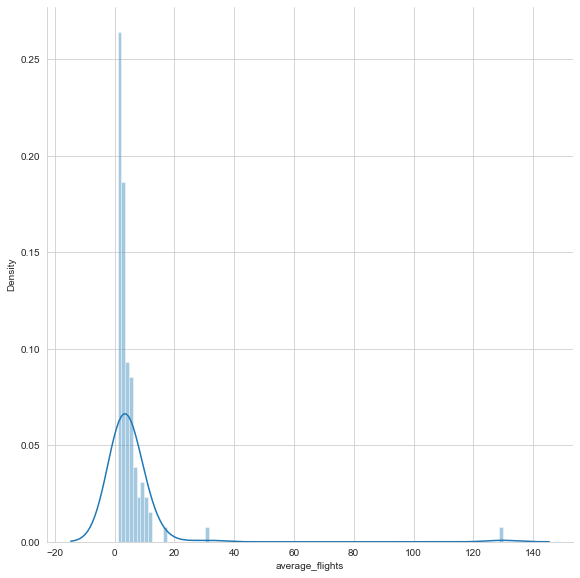

In [12]:
sns.FacetGrid(city_avgflights['average_flights'], height=8)
sns.set_style("whitegrid")
sns.distplot(city_avgflights['average_flights'], bins=101)

C:\Users\Dinmukhamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


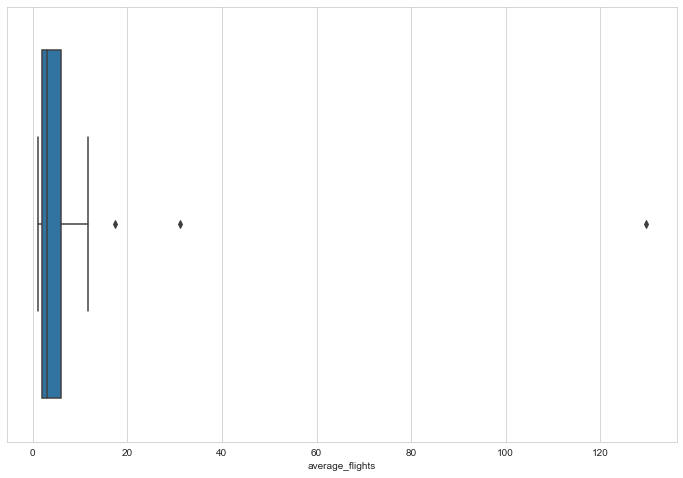

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(city_avgflights['average_flights'])
plt.show()

*Да у нас тут не 1 победитель, а сразу 3 призовых мест*

In [14]:
display(city_avgflights.query('average_flights > 12'))

,city,average_flights
43,Москва,129.774194
54,Новосибирск,17.322581
70,Санкт-Петербург,31.161290


*В принципе тут все очевидно*

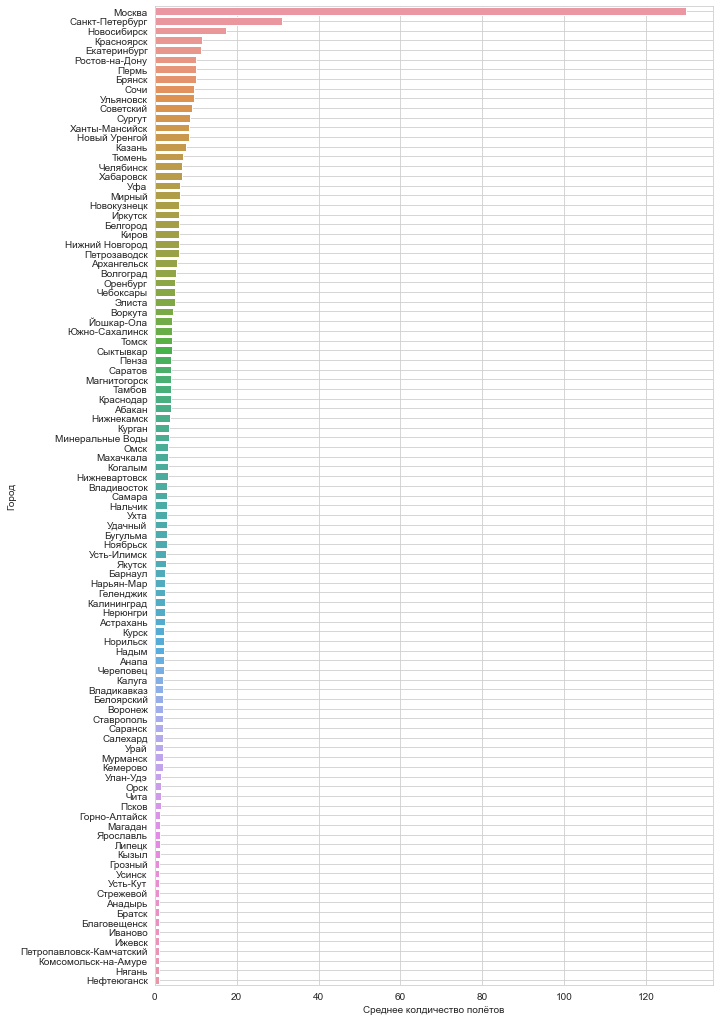

In [15]:
city_avgflights = city_avgflights.sort_values(by='average_flights', ascending=False)
plt.figure(figsize=(10, 18))
sns.barplot(x=city_avgflights['average_flights'], y=city_avgflights['city'])
plt.xlabel('Среднее колдичество полётов')
plt.ylabel('Город')
plt.grid(True)
plt.show()

*Мегаполисы явно здесь выделяются сильно*

*Выделим топ-10 городов*

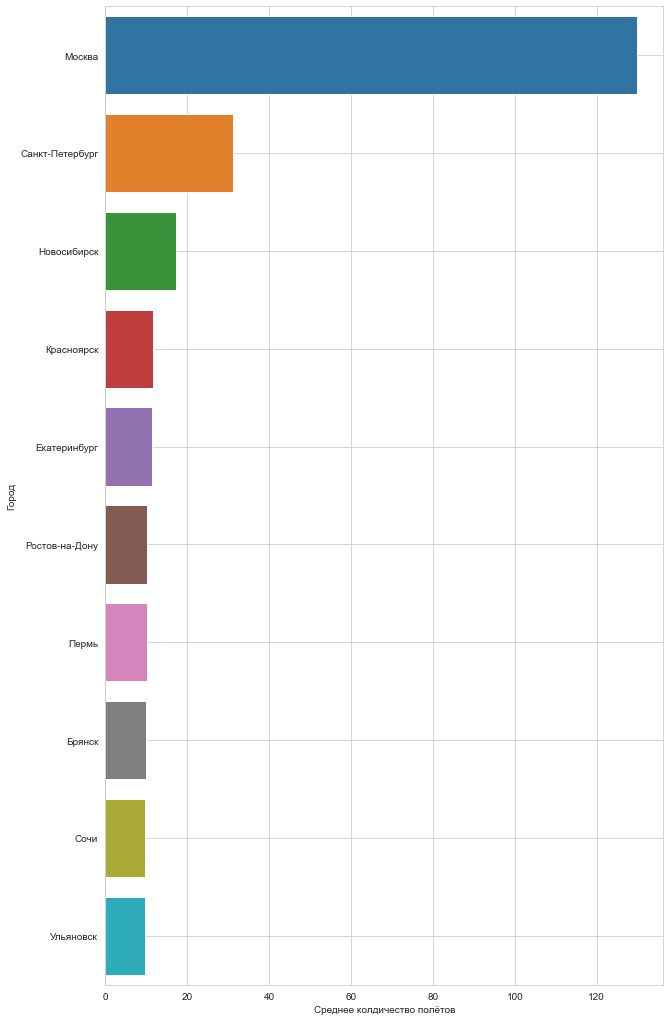

In [16]:
city_avgflights_top10 = city_avgflights.head(10)
plt.figure(figsize=(10, 18))
sns.barplot(x=city_avgflights_top10['average_flights'], y=city_avgflights_top10['city'])
plt.xlabel('Среднее колдичество полётов')
plt.ylabel('Город')
plt.grid(True)
plt.show()

## Вывод

*Был проведен анализ популярных моделей воздушных бортов и популярных городов*.

*Если про самолеты мы можем мало сказать в связи отсутствия тех. и экон. характеристик, которые помогли бы нам выявить показатели конкурентоспособности и причины выбора данных моделей авиакомпаниями, то вот про города можно сказать здесь больше. Во-первых тут все очевидно, что мегаполисы, где есть промышленность, мл и ср бизнес, инфраструктура, и тп буду в приоритете выбора полета. Также, как правило в таких городах у населения и по бюджету возможностей больше, чтобы полетать, возможно, если бы были данные по поездам или информация по въездам-выездам постов(автомобильные движения), то картина могла бы поменяться*